Types of classification:-
1. Binary Classification:- If there are only two classes and we have to predict one. Ex:- spam or non-spam, male or female etc.
2. Multi_class classification:- If there are many classes and we have to predict one . Ex:- Cow, Dog, Horse,Cat,Goat are the classes and we have to choose one from the list(our output will belong to one of them)
3. Multi Label:- If we have many classes and the output might belong to two or more classes. Ex:- suppose any Movie then it might belong to many classes like Action, Drama, Thriller etc

In [2]:
pip install tensorflow-gpu==2.0.0

     |████████████████████████████████| 380.8MB 16kB/s 
     |████████████████████████████████| 3.8MB 30.2MB/s 
     |████████████████████████████████| 450kB 59.7MB/s 
     |████████████████████████████████| 81kB 12.2MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.10.1 which is incompatible.
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found exis

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
print(tf.__version__) 

2.0.0


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [0]:
from tqdm import tqdm # for progress bar

In [6]:
!git clone https://github.com/laxmimerit/Movies-Poster_Dataset.git


Cloning into 'Movies-Poster_Dataset'...
remote: Enumerating objects: 7873, done.
remote: Counting objects: 100% (7873/7873), done.
remote: Compressing objects: 100% (7873/7873), done.
remote: Total 7873 (delta 1), reused 7872 (delta 0), pack-reused 0
Receiving objects: 100% (7873/7873), 246.59 MiB | 51.91 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Checking out files: 100% (7871/7871), done.


In [7]:
data = pd.read_csv('/content/Movies-Poster_Dataset/train.csv')
data.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [8]:
data.shape

(7254, 27)

making all the images with fixed resolution(size)

In [9]:
img_width = 350
img_height = 350

X=[]

for i in tqdm(range(data.shape[0])): # tqdm shows the progress bar, range(7254)
  path = '/content/Movies-Poster_Dataset/Images/' + data['Id'][i] + '.jpg'  # here we are taking all the images fro Images folder in appropiate format
  img = image.load_img(path,target_size=(img_width,img_height,3))  # changing resolution
  img = image.img_to_array(img)  # converting to numpy array
  img = img/255.0  # I know this, dont I?
  X.append(img)  # X list ma sab img lai haleko

X = np.array(X)  # list lai numpy array ma convert gareko

100%|██████████| 7254/7254 [00:30<00:00, 231.64it/s]


In [10]:
X.shape

(7254, 350, 350, 3)

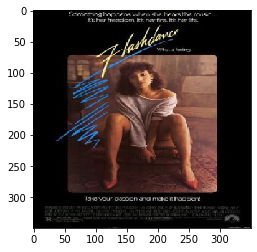

In [13]:
plt.imshow(X[1])
plt.show()

Now we can see the resolution of image is 350/350

In [14]:
data['Genre'][1]

"['Drama', 'Romance', 'Music']"

this is the genre of the above given image

In [15]:
y = data.drop(['Id','Genre'], axis = 1) # all other rows are the labels of our model
y = y.to_numpy()
y.shape

(7254, 25)

In [16]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.15, random_state = 0)
x_train.shape, x_test.shape

((6165, 350, 350, 3), (1089, 350, 350, 3))

**Build a CNN**

In [0]:
model = Sequential()

model.add(Conv2D(16,(3,3),activation='relu', input_shape=(350,350,3) ))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3),activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(128,(3,3),activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(25,activation='sigmoid')) # here we have 25 labels or classes and the final value can be 0 or 1 which can be better predicted by Sigmoid


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 348, 348, 16)      448       
_________________________________________________________________
batch_normalization (BatchNo (None, 348, 348, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 174, 174, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 174, 174, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 172, 172, 32)      4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 172, 172, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 86, 86, 32)        0

In [0]:
model.compile(optimizer='adam', loss ='binary_crossentropy', metrics = ['accuracy'])

In [20]:
history = model.fit(x_train,y_train,epochs = 5, validation_data=(x_test,y_test))

Train on 6165 samples, validate on 1089 samples
Epoch 1/5
6165/6165 [==============================] - 270s 44ms/sample - loss: 0.6943 - accuracy: 0.6489 - val_loss: 0.3256 - val_accuracy: 0.9067
Epoch 2/5
6165/6165 [==============================] - 224s 36ms/sample - loss: 0.3133 - accuracy: 0.8907 - val_loss: 0.2657 - val_accuracy: 0.9071
Epoch 3/5
6165/6165 [==============================] - 226s 37ms/sample - loss: 0.2606 - accuracy: 0.9070 - val_loss: 0.2449 - val_accuracy: 0.9085
Epoch 4/5
6165/6165 [==============================] - 216s 35ms/sample - loss: 0.2527 - accuracy: 0.9086 - val_loss: 0.2388 - val_accuracy: 0.9102
Epoch 5/5
6165/6165 [==============================] - 225s 37ms/sample - loss: 0.2456 - accuracy: 0.9113 - val_loss: 0.2402 - val_accuracy: 0.9088


In [21]:
history.history

{'accuracy': [0.6489084, 0.8907119, 0.90703666, 0.9085871, 0.9113316],
 'loss': [0.6942952123049886,
  0.3133439274430758,
  0.2605592561560922,
  0.252741376534769,
  0.2455998959622534],
 'val_accuracy': [0.90674025, 0.90714425, 0.9085398, 0.9102295, 0.9087604],
 'val_loss': [0.32564796590826944,
  0.2657094536241421,
  0.24492230283436806,
  0.23877546817912654,
  0.2402329296557809]}

In [0]:
def plot_curve(history):
  epoch_range =range(1,6)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title("Model_Accuracy")
  
  plt.ylabel("accuracy")
  plt.xlabel("epoch")
  plt.legend(['train','val'], loc = "upper left")
  plt.show()

  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title("Model_loss")
  
  plt.ylabel("loss")
  plt.xlabel("epoch")
  plt.legend(['train','val'], loc = "upper right")
  plt.show()

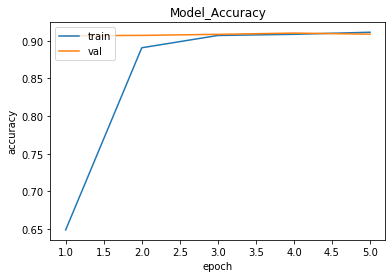

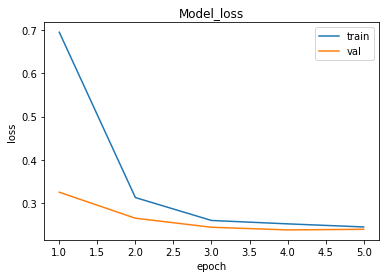

In [25]:
plot_curve(history)

here we can see the model is nearly overfitting but its okay.

In [0]:
def predict(img_name):
  img = image.load_img(img_name,target_size=(img_width,img_height,3))  # changing resolution
  
  plt.imshow(img)
  plt.show()

  img = image.img_to_array(img)  # converting to numpy array
  img = img/255.0  # I know this, dont I?
  
  img = img.reshape(1,350,350,3)
  classes = data.columns[2:] # 2nd column dekhi paxadi sab genres haru xan
  prdn = model.predict(img)
  top_prdn = np.argsort(prdn[0])[:-4:-1] # last ko 3 item dinxa, argsort ko last 3 elems chai max elements hunxan

  print("the genre are:-")
  for i in top_prdn:
    print(classes[i])



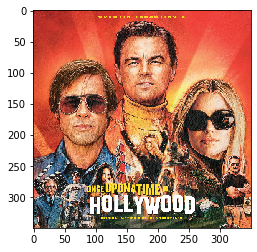

the genre are:-
Drama
Comedy
Romance


In [59]:
predict('once_upon_a_time_in_holl.jpg')

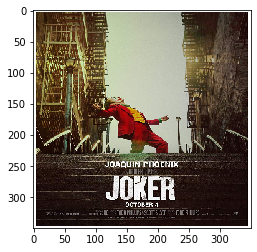

the genre are:-
Drama
Action
Crime


In [60]:
predict('joker.jpg')

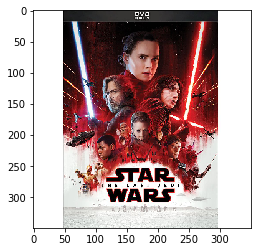

the genre are:-
Drama
Action
Comedy


In [61]:
predict('star_wars.jpg')

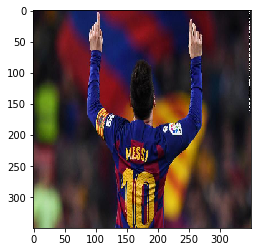

the genre are:-
Drama
Action
Crime


In [63]:
predict('messi.jpg')

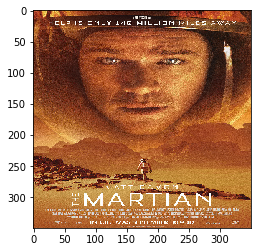

the genre are:-
Drama
Comedy
Romance


In [64]:
predict('martian.jpg')

In this way we can see our model has predicted the images

## rough section

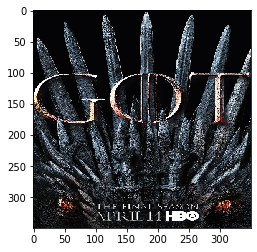

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'N/A', 'News', 'Reality-TV', 'Romance',
       'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object')
the genre are:-
Drama
Action
Thriller


In [57]:
  img = image.load_img('GOT.jpg',target_size=(img_width,img_height,3))  # changing resolution
  
  plt.imshow(img)
  plt.show()

  img = image.img_to_array(img)  # converting to numpy array
  img = img/255.0  # I know this, dont I?
  
  img = img.reshape(1,350,350,3)
  classes = data.columns[2:]
  print(classes)
  prdn = model.predict(img)
  top_prdn = np.argsort(prdn[0])[:-4:-1]

  print("the genre are:-")
  for i in top_prdn:
    print(classes[i])


In [45]:
classes[1]

'Adventure'

In [46]:
for i in top_prdn:
  print(i)

7
4
18


In [49]:
prdn.max()

0.5845003

In [50]:
prdn

array([[0.17306176, 0.08904085, 0.01726675, 0.04963207, 0.41797775,
        0.14134184, 0.08106348, 0.5845003 , 0.06251386, 0.05924159,
        0.02010885, 0.03759319, 0.03734675, 0.00917807, 0.04732263,
        0.00402275, 0.00332248, 0.00286657, 0.2459121 , 0.02982682,
        0.00455496, 0.03099266, 0.09761268, 0.01887241, 0.00608564]],
      dtype=float32)

In [56]:
np.argsort(prdn)

array([[17, 16, 15, 20, 24, 13,  2, 23, 10, 19, 21, 12, 11, 14,  3,  9,
         8,  6,  1, 22,  5,  0, 18,  4,  7]])